# OCR With GUI Using PyTesseract

### Add the Modules

In [81]:
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
import cv2
import numpy as np
import tkinter as tk
# from tkinter import PhotoImage
import matplotlib.pyplot as plt
from tkinter import filedialog, Text, Scrollbar
from tkinter import Tk

In [82]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### Image Preprocessing

In [83]:
def preprocess_image(image):
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Apply morphological operations (opening and closing) to further remove noise and fill gaps in characters
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

    return closing

Example usage

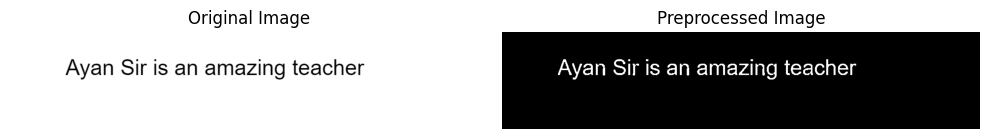

In [84]:
# Provide the image file path
file_path = 'AyanSirW.png'

# Load the image
image = cv2.imread(file_path)

# Preprocess the image
preprocessed_image = preprocess_image(image)

# Display the original and preprocessed images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

# Show the images
plt.tight_layout()
plt.show()


### Text Extraction From JPG

In [85]:
def extract_text_from_image(file_path):
    image = cv2.imread(file_path)
    preprocessed_image = preprocess_image(image)
    return pytesseract.image_to_string(preprocessed_image)

Example usage

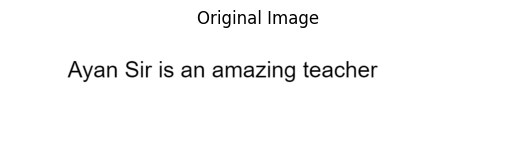

Extracted Text:
Ayan Sir is an amazing teacher



In [86]:
image_path = ('AyanSirW.png')
text = extract_text_from_image(image_path)
image = cv2.imread(image_path)

# Display the original image

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Print the extracted text
print("Extracted Text:")
print(text)

### Function to open the file

In [87]:
def open_file():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp"), ("PDF files", "*.pdf")]
    )
    if file_path:
        if file_path.lower().endswith('.pdf'):
            extracted_text = extract_text_from_pdf(file_path)
        else:
            extracted_text = extract_text_from_image(file_path)
        display_text(extracted_text)

### Function to display the extracted Text

In [88]:
def display_text(text):
    text_box.delete(1.0, tk.END)
    text_box.insert(tk.END, text)

### Function to export into TXT file

In [89]:
def export_text():
    extracted_text = text_box.get(1.0, tk.END)
    if extracted_text.strip():
        save_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
        if save_path:
            with open(save_path, 'w') as file:
                file.write(extracted_text)
                print("Text saved successfully to:", save_path)

### Setup the GUI

In [90]:
# Initialize the main window
root = Tk()
root.title("OCR Project")


# Set the size of the window
root.geometry("800x600") 



# Create and place the Open File button
frame = tk.Frame(root)
frame.pack(pady=20)

open_file_button = tk.Button(frame, text="Open File", padx=10, pady=5, fg="white", bg="blue", command=open_file)
open_file_button.pack(side=tk.LEFT, padx=10)

# Create the Export button
export_button = tk.Button(frame, text="Export to TXT", padx=10, pady=5, fg="white", bg="green", command=export_text)
export_button.pack(side=tk.LEFT, padx=10)

# Create a frame for the text box with a scrollbar
text_frame = tk.Frame(root)
text_frame.pack(pady=100)

scrollbar = Scrollbar(text_frame)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

text_box = Text(text_frame, wrap=tk.WORD, yscrollcommand=scrollbar.set)
text_box.pack()

scrollbar.config(command=text_box.yview)

# Run the main loop
root.mainloop()